# Project 3 - How Many Upvotes
### CS 5/7394 - Applied Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
upvotes = pd.read_csv("C:/Users/Joshua Ayodele/Downloads/archive (6)/train_NIR5Yl1.csv")
housing = pd.read_csv("C:/Users/Joshua Ayodele/Downloads/archive (5)/WakeCountyHousing.csv")

In [3]:
upvotes.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
upvotes.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [5]:
upvotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [6]:
upvotes.isna().any()

ID            False
Tag           False
Reputation    False
Answers       False
Username      False
Views         False
Upvotes       False
dtype: bool

## 1. One Hot Encoder

In [7]:
#Performing one hot encoding on the tag variable due to it being categorical in nature
#This will also help the ml algorithm understand the variable more
upvotes = pd.get_dummies(upvotes, columns=["Tag"], dtype=int)

In [8]:
#Checking how the dataframe looks after performing the operation
upvotes.head()

,ID,Reputation,Answers,Username,Views,Upvotes,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,52664,3942.0,2.0,155623,7855.0,42.0,1,0,0,0,0,0,0,0,0,0
1,327662,26046.0,12.0,21781,55801.0,1175.0,1,0,0,0,0,0,0,0,0,0
2,468453,1358.0,4.0,56177,8067.0,60.0,0,1,0,0,0,0,0,0,0,0
3,96996,264.0,3.0,168793,27064.0,9.0,1,0,0,0,0,0,0,0,0,0
4,131465,4271.0,4.0,112223,13986.0,83.0,0,1,0,0,0,0,0,0,0,0


In [9]:
#Checking the dataypes for each variable
upvotes.info()
#As you can see, the datatype for tags after the one hot encoder operation is integer whcih is optimal for the regression/classifier models

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Reputation  330045 non-null  float64
 2   Answers     330045 non-null  float64
 3   Username    330045 non-null  int64  
 4   Views       330045 non-null  float64
 5   Upvotes     330045 non-null  float64
 6   Tag_a       330045 non-null  int32  
 7   Tag_c       330045 non-null  int32  
 8   Tag_h       330045 non-null  int32  
 9   Tag_i       330045 non-null  int32  
 10  Tag_j       330045 non-null  int32  
 11  Tag_o       330045 non-null  int32  
 12  Tag_p       330045 non-null  int32  
 13  Tag_r       330045 non-null  int32  
 14  Tag_s       330045 non-null  int32  
 15  Tag_x       330045 non-null  int32  
dtypes: float64(4), int32(10), int64(2)
memory usage: 27.7 MB


In [10]:
#Checking to see what kind of correlation exists between upvotes and the other variables
upvotes.corr()["Upvotes"].sort_values(ascending=False)

Upvotes       1.000000
Views         0.437336
Reputation    0.266710
Answers       0.202033
Tag_j         0.029889
Tag_p         0.007566
ID            0.006328
Tag_h         0.003388
Tag_c        -0.001467
Tag_a        -0.001909
Tag_x        -0.007620
Tag_s        -0.007712
Username     -0.011970
Tag_o        -0.013469
Tag_r        -0.014241
Tag_i        -0.020216
Name: Upvotes, dtype: float64

<AxesSubplot:xlabel='Username', ylabel='Upvotes'>

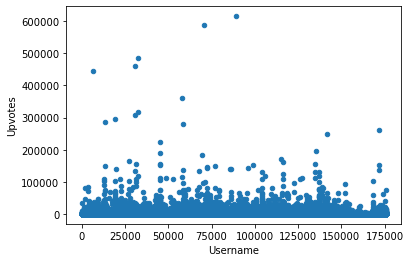

In [11]:
upvotes.plot(kind="scatter", x="Username", y="Upvotes")

## 2. Standardizing features via sklearn.preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
Y = upvotes[["Upvotes"]]
X = upvotes.drop("Upvotes", 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

C:\Users\JOSHUA~1\AppData\Local\Temp/ipykernel_11316/2273625976.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = upvotes.drop("Upvotes", 1)


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## 3. Using sklearn.linear_model.LinearRegression

In [14]:
from sklearn.linear_model import LinearRegression
reg_lr = LinearRegression()
reg_lr.fit(x_train, y_train)

LinearRegression()

In [15]:
lin_pred = reg_lr.predict(x_test)

## 4. Using sklearn.metrics.mean_squared_error and sklearn.metrics.mean_absoluter_error

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_test, lin_pred)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = np.sqrt(lin_mse)
score = reg_lr.score(x_test, y_test)
lin_mae, lin_rmse, lin_mse, score

(0.16781388400996922,
 0.9623393296195969,
 0.9260969853326952,
 0.2213216106412118)

## 5. Using sklearn.tree.DecisionTreeRegressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [18]:
tree_pred = tree_reg.predict(x_test)

In [19]:
tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse, tree_mse

(0.5166802330805871, 0.26695846325620975)

## 6. Using cross_val_score for DecisionTreeRegressor model

In [20]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_reg, x_train, y_train)
score, score.mean()

(array([0.82140039, 0.77718647, 0.74749663, 0.75697801, 0.61548268]),
 0.7437088350926357)

## 7. Using Grid Search CV

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {"splitter":["best","random"],
            "max_depth" : [1,3,5],
            "min_samples_leaf":[1,2,3],
            "min_weight_fraction_leaf":[0.1,0.2,0.3],
            "max_features":["auto",None],
            "max_leaf_nodes":[None,10] }
grid = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid.fit(x_train, y_train)
grid.best_params_, grid.best_estimator_

({'max_depth': 5,
  'max_features': 'auto',
  'max_leaf_nodes': None,
  'min_samples_leaf': 1,
  'min_weight_fraction_leaf': 0.1,
  'splitter': 'best'},
 DecisionTreeRegressor(max_depth=5, max_features='auto',
                       min_weight_fraction_leaf=0.1))

## 8. Using an Ensemble of Methods: GradientBoostingRegressor

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
params = {"n_estimators": 4, "max_depth": 4, "min_samples_split": 5, "learning_rate": 0.01}
grad_reg = GradientBoostingRegressor(**params)

In [23]:
grad_reg.fit(x_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=4)

In [24]:
grad_pred = grad_reg.predict(x_test)

In [25]:
grad_mse = mean_squared_error(y_test, grad_pred)
grad_rmse = np.sqrt(grad_mse)
grad_rmse, grad_mse

(1.0614411675121058, 1.1266573520894623)

## 9. Full pipeline using DecisionTreeRegressor as the predictor model

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
pipeline_tree = Pipeline([("scaler", StandardScaler()),
                          ("Tree_regressor", DecisionTreeRegressor())])

In [27]:
tree_pipe = pipeline_tree.fit(x_train, y_train)
tree_pipe.predict(x_test)
tree_pipe.score(x_test, y_test)

0.7503675156604324